**Importing necessary libraries**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading CSV files**

In [134]:
user_details = pd.read_csv('UserDetails.csv')
cooking_sessions = pd.read_csv('CookingSessions.csv')
order_details = pd.read_csv('OrderDetails.csv')

In [135]:
user_details.head()

,User ID,User Name,Age,Location,Registration Date,Phone,Email,Favorite Meal,Total Orders
0,U001,Alice Johnson,28,New York,2023-01-15,123-456-7890,alice@email.com,Dinner,12
1,U002,Bob Smith,35,Los Angeles,2023-02-20,987-654-3210,bob@email.com,Lunch,8
2,U003,Charlie Lee,42,Chicago,2023-03-10,555-123-4567,charlie@email.com,Breakfast,15
3,U004,David Brown,27,San Francisco,2023-04-05,444-333-2222,david@email.com,Dinner,10
4,U005,Emma White,30,Seattle,2023-05-22,777-888-9999,emma@email.com,Lunch,9


In [136]:
cooking_sessions.head()

,Session ID,User ID,Dish Name,Meal Type,Session Start,Session End,Duration (mins),Session Rating
0,S001,U001,Spaghetti,Dinner,2024-12-01 19:00,2024-12-01 19:30,30,4.5
1,S002,U002,Caesar Salad,Lunch,2024-12-01 12:00,2024-12-01 12:20,20,4.0
2,S003,U003,Grilled Chicken,Dinner,2024-12-02 19:30,2024-12-02 20:10,40,4.8
3,S004,U001,Pancakes,Breakfast,2024-12-02 07:30,2024-12-02 08:00,30,4.2
4,S005,U004,Caesar Salad,Lunch,2024-12-03 13:00,2024-12-03 13:15,15,4.7


In [137]:
order_details.head()

,Order ID,User ID,Order Date,Meal Type,Dish Name,Order Status,Amount (USD),Time of Day,Rating,Session ID
0,1001,U001,2024-12-01,Dinner,Spaghetti,Completed,15.0,Night,5.0,S001
1,1002,U002,2024-12-01,Lunch,Caesar Salad,Completed,10.0,Day,4.0,S002
2,1003,U003,2024-12-02,Dinner,Grilled Chicken,Canceled,12.5,Night,NaN,S003
3,1004,U001,2024-12-02,Breakfast,Pancakes,Completed,8.0,Morning,4.0,S004
4,1005,U004,2024-12-03,Lunch,Caesar Salad,Completed,9.0,Day,4.0,S005


- "OrderDetails" have null values in "Rating" column

- Filling Null values in "Rating" column with average of Rating

In [138]:
order_details.fillna(order_details['Rating'].mean(), inplace=True)
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      16 non-null     int64  
 1   User ID       16 non-null     object 
 2   Order Date    16 non-null     object 
 3   Meal Type     16 non-null     object 
 4   Dish Name     16 non-null     object 
 5   Order Status  16 non-null     object 
 6   Amount (USD)  16 non-null     float64
 7   Time of Day   16 non-null     object 
 8   Rating        16 non-null     float64
 9   Session ID    16 non-null     object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.4+ KB


**- Removing Duplicates**

In [139]:
user_details.drop_duplicates(inplace=True)
cooking_sessions.drop_duplicates(inplace=True)
order_details.drop_duplicates(inplace=True)

**- Converting all date columns in datetime format**

In [140]:
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [141]:
user_details.info()
cooking_sessions.info()
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            10 non-null     object        
 1   User Name          10 non-null     object        
 2   Age                10 non-null     int64         
 3   Location           10 non-null     object        
 4   Registration Date  10 non-null     datetime64[ns]
 5   Phone              10 non-null     object        
 6   Email              10 non-null     object        
 7   Favorite Meal      10 non-null     object        
 8   Total Orders       10 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 848.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Session

**- Merging all the three datasets for better EDA**

In [142]:
df = user_details.merge(cooking_sessions, on='User ID').merge(order_details, on='Session ID')

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID_x          16 non-null     object        
 1   User Name          16 non-null     object        
 2   Age                16 non-null     int64         
 3   Location           16 non-null     object        
 4   Registration Date  16 non-null     datetime64[ns]
 5   Phone              16 non-null     object        
 6   Email              16 non-null     object        
 7   Favorite Meal      16 non-null     object        
 8   Total Orders       16 non-null     int64         
 9   Session ID         16 non-null     object        
 10  Dish Name_x        16 non-null     object        
 11  Meal Type_x        16 non-null     object        
 12  Session Start      16 non-null     datetime64[ns]
 13  Session End        16 non-null     datetime64[ns]
 14  Duration (mi

**Popular Dishes**

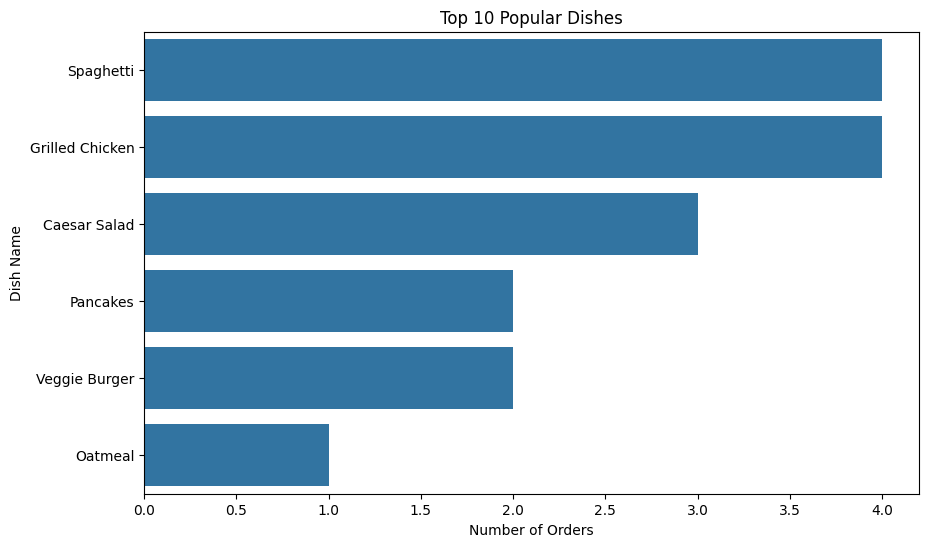

In [144]:
popular_dishes = df['Dish Name_x'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_dishes.values, y=popular_dishes.index)
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.show()

**Insights:**

- Spaghetti and Grilled Chicken are the most popular.

- Oatmeal and Veggie Burger have the lowest order numbers.

**Recommendations:**

- Highlight Spaghetti and Grilled Chicken in marketing campaigns.

- Improve or consider removing Oatmeal and Veggie Burger from the menu.
- Create meal bundles that pair popular dishes with Oatmeal and Veggie Burger.

**User Demographic**

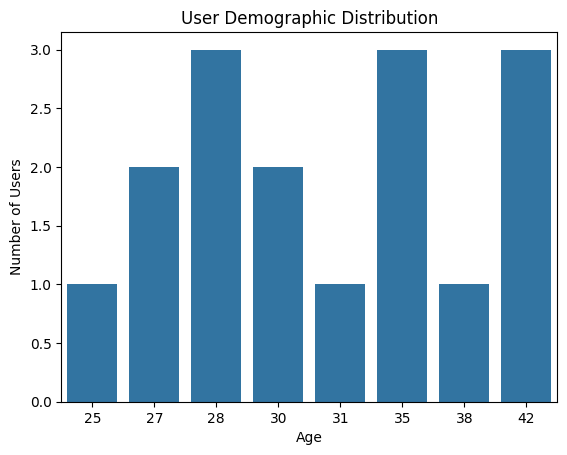

In [145]:
sns.countplot(x='Age', data=df)
plt.title('User Demographic Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

**Insights:**
- The highest number of users are aged 28, 35, and 42.
- The lowest number of users are aged 25, 31, and 38.

**Recommendations:**
- Focus marketing on the 28, 35, and 42 age groups to maximize engagement.
- Develop campaigns to attract users aged 25, 31, and 38, such as special offers or discounts.
- Gather feedback from lower-engagement age groups to understand their preferences and improve offers.


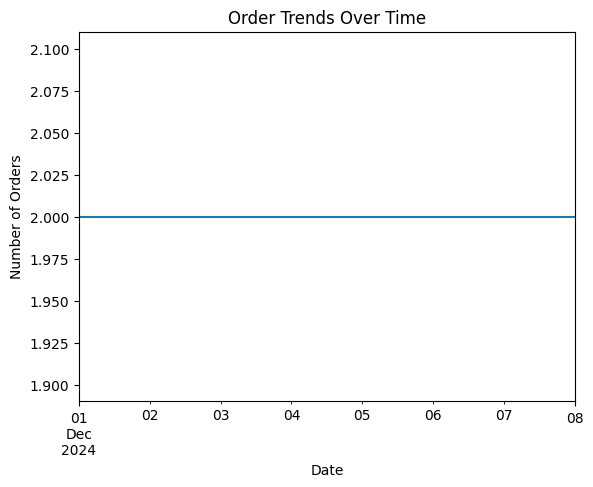

In [146]:
order_trends = df.groupby('Order Date')['Order ID'].count()
order_trends.plot(kind='line')
plt.title('Order Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

**Insights:**
- The straight line indicates that we only have the data of 2 orders per day.

**Recommandations:**
- Given the limited data, it is challenging to derive meaningful recommendations at this time.

**Cooking Sessions Duration Over Time**

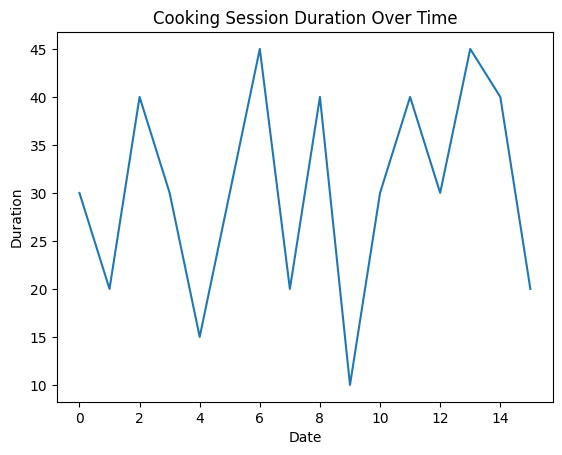

In [147]:
cooking_sessions_duration = (cooking_sessions['Session End'] - cooking_sessions['Session Start']).dt.total_seconds() / 60
cooking_sessions_duration.plot(kind='line')
plt.title('Cooking Session Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Duration')
plt.show()

**Insights:**
- The longest cooking sessions occurred on the 6th and 13th, each lasting 45 minutes, followed by the 8th and 11th with 40 minutes.
- The shortest cooking session was on the 9th at 10 minutes, followed by the 4th at 15 minutes.

**Recommendations:**
- Investigate what contributed to the longer cooking times on the 6th and 13th to replicate successful factors in future sessions.
- Implement strategies to encourage longer cooking sessions on days with historically low cooking times, such as offering incentives or special recipes.
- Enhance recipe instructions or provide additional resources on days with shorter cooking times to encourage users to spend more time cooking.


**Order Amount by Age**

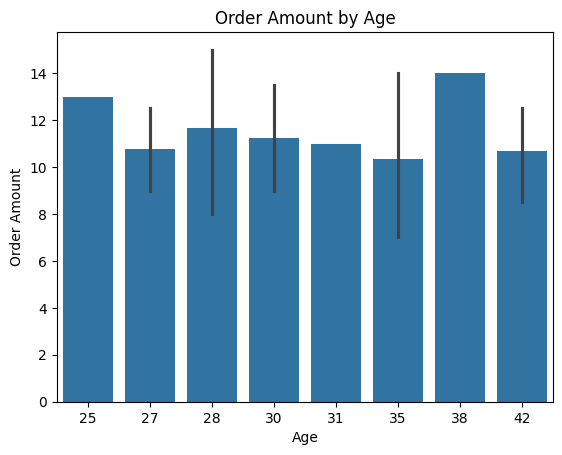

In [148]:
sns.barplot(x='Age', y='Amount (USD)', data=df)
plt.title('Order Amount by Age')
plt.xlabel('Age')
plt.ylabel('Order Amount')
plt.show()

**Insights:**
- Users aged 25 and 38 spent the maximum amounts.
- Users aged 27 and 35 recorded the minimum spending amounts.

**Recommendations:**
- Develop targeted marketing campaigns aimed at users aged 25 and 38 to encourage repeat purchases and loyalty.
- Analyze the preferences and behaviors of users aged 27 and 35 to identify barriers to higher spending.
- Create tailored promotions or discounts for users in the lower spending age groups to incentivize increased spending.



**Dish Distribution**

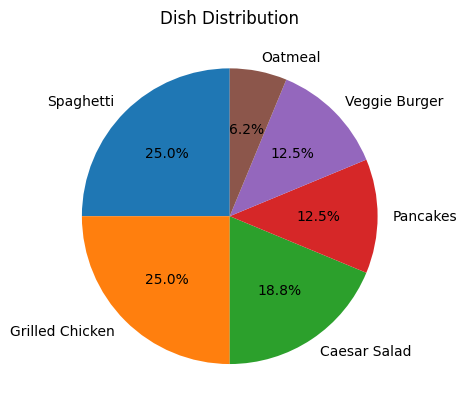

In [149]:
dish_distribution = df['Dish Name_y'].value_counts()
dish_distribution.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Dish Distribution')
plt.ylabel('')
plt.show()

**Insights:**
- Spaghetti and Grilled Chicken each account for 25% of total orders, together contributing to 50% of all orders.
- Oatmeal contributes the least at 6.2% of total orders.
- Pancakes and Veggie Burger each contribute 12.5%, while Caesar Salad contributes 18.8% of total orders.

**Recommendations:**
- Focus marketing efforts on Spaghetti and Grilled Chicken to further capitalize on their popularity and drive sales.
- Consider improving the recipe or presentation of Oatmeal to increase its appeal and boost its contribution to total orders.
- Create promotional bundles that include Pancakes, Veggie Burger, and Caesar Salad to encourage customers to try these dishes together.